In [1]:
import pandas as pd
import numpy as np
from plotnine import *


df = pd.read_csv('Slopecharts_Data1.csv')

left_label = df.apply(lambda x: x['Contry']+',' + str(x['1970']), axis=1)
right_label = df.apply(lambda x: x['Contry']+',' + str(x['1979']), axis=1)
df['class'] = df.apply(lambda x: "red" if x['1979'] -
                       x['1970'] < 0 else "green", axis=1)

#list(map(lambda x,y:"red" if x-y<0 else "green", left_label,right_label))
df


,Contry,1970,1979,class
0,Argentina,67,74,green
1,Bangladesh,54,53,red
2,Brazil,62,68,green
3,Canada,73,80,green
4,China,68,72,green
5,Egypt,60,61,green
6,France,74,82,green
7,India,57,58,green
8,Indonesia,59,63,green
9,Iran,64,65,green


## (a)两年份对比

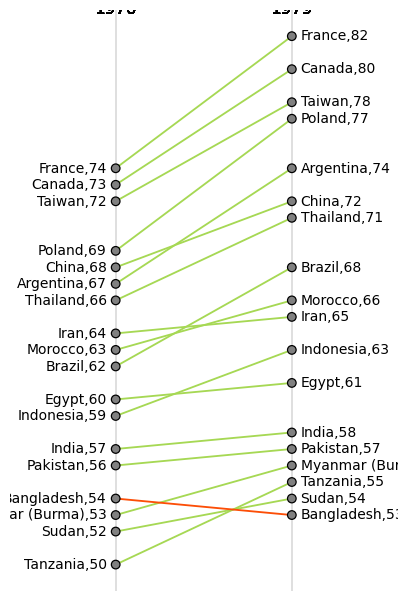

<ggplot: (83485529872)>


In [2]:
base_plot = (ggplot(df) +
             # 连接线
             geom_segment(aes(x=1, xend=2, y='1970', yend='1979', color='class'), size=.75, show_legend=False) +
             # 1952年的垂直直线
             geom_vline(xintercept=1, linetype="solid", size=.1) +
             # 1957年的垂直直线
             geom_vline(xintercept=2, linetype="solid", size=.1) +
             # 1952年的数据点
             geom_point(aes(x=1, y='1970'), size=3, shape='o', fill="grey", color="black") +
             # 1957年的数据点
             geom_point(aes(x=2, y='1979'), size=3, shape='o', fill="grey", color="black") +
             scale_color_manual(labels=("Up", "Down"), values=("#A6D854", "#FC4E07")) +
             xlim(.5, 2.5))
# 添加文本信息
base_plot = (base_plot + geom_text(label=left_label, y=df['1970'], x=0.95,  size=10, ha='right')
             + geom_text(label=right_label,
                         y=df['1979'], x=2.05, size=10, ha='left')
             + geom_text(label="1970", x=1, y=1.02 *
                         (np.max(np.max(df[['1970', '1979']]))),  size=12)
             + geom_text(label="1979", x=2, y=1.02 *
                         (np.max(np.max(df[['1970', '1979']]))),  size=12)
             + theme_void()
             + theme(
    aspect_ratio=1.5,
    figure_size=(5, 6),
    dpi=100
)
)
print(base_plot)


## (b)多年份对比

,continent,2007,2008,2009,2010,2011,2012,2013,group
0,Germany,2428500.0,2473800.0,2374500.0,2476800.0,2570000.0,2626427.9,2705181.1,red
1,United Kingdom,2054237.7,1800710.8,1564467.9,1706301.9,1747315.6,1862190.7,1931407.6,green
2,France,1886792.1,1933195.0,1889231.0,1932801.5,1987699.4,2027969.8,2092928.4,red
3,Italy,1554198.9,1575143.9,1526790.4,1556028.6,1586209.0,1617154.7,1660133.6,red
4,Spain,1053161.0,1087749.0,1047831.0,1051342.0,1074940.5,1094290.0,1123495.9,red
5,Netherlands,571773.0,594481.0,571145.0,588414.0,607435.2,622714.0,639563.6,red
6,Sweden,337944.2,333255.7,291347.0,346536.4,386201.6,396188.4,409582.5,red
7,Austria,274019.8,282746.0,274818.2,286197.3,300891.3,310133.3,322190.4,red
8,Denmark,227533.9,235133.0,223985.3,235608.6,241148.1,249122.9,258155.3,red
9,Portugal,169319.2,171983.1,168503.6,172571.2,171632.4,168286.4,172647.7,red


,continent,group,variable,value
0,Germany,red,2007,2428500
1,United Kingdom,green,2007,2054237
2,France,red,2007,1886792
3,Italy,red,2007,1554198
4,Spain,red,2007,1053161
...,...,...,...,...
93,Portugal,red,2013,172647
94,Hungary,red,2013,100059
95,Slovakia,red,2013,75123
96,Lithuania,red,2013,34545


C:\QMDownload\anaconda\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 84 rows containing missing values.
C:\QMDownload\anaconda\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 84 rows containing missing values.


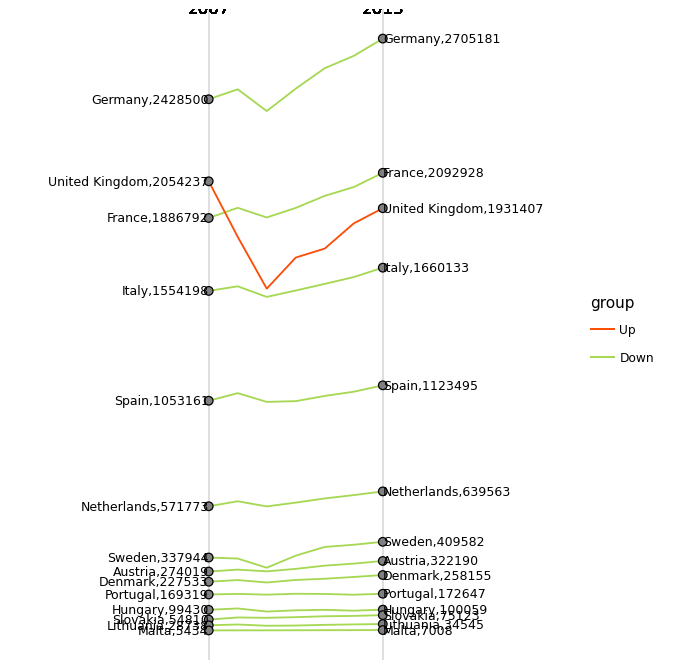

<ggplot: (83612867238)>


In [3]:
df = pd.read_csv('Slopecharts_Data2.csv')

df['group'] = df.apply(lambda x: "green" if x['2007'] > x['2013'] else "red", axis=1)

df2 = pd.melt(df, id_vars=["continent", 'group'])

df2.value = df2.value.astype(int)
df2.variable = df2.variable.astype(int)

left_label = df2.apply(lambda x:  x['continent']+',' +
                       str(x['value']) if x['variable'] == 2007 else "", axis=1)
right_label = df2.apply(lambda x:  x['continent']+',' +
                        str(x['value']) if x['variable'] == 2013 else "", axis=1)

left_point = df2.apply(
    lambda x: x['value'] if x['variable'] == 2007 else np.nan, axis=1)
right_point = df2.apply(
    lambda x: x['value'] if x['variable'] == 2013 else np.nan, axis=1)

display(df, df2)

base_plot = (ggplot(df2) +
             geom_line(aes(x='variable', y='value', group='continent', color='group'), size=.75) +
             geom_vline(xintercept=2007, linetype="solid", size=.1) +
             geom_vline(xintercept=2013, linetype="solid", size=.1) +
             geom_point(aes(x='variable', y=left_point), size=3, shape='o', fill="grey", color="black") +
             geom_point(aes(x='variable', y=right_point), size=3, shape='o', fill="grey", color="black") +
             scale_color_manual(labels=("Up", "Down"), values=("#FC4E07",  "#A6D854")) +
             xlim(2001, 2018))

base_plot = (base_plot + geom_text(label=left_label, y=df2['value'], x=2007,  size=9, ha='right')
             + geom_text(label=right_label,
                         y=df2['value'], x=2013, size=9, ha='left')
             + geom_text(label="2007", x=2007, y=1.05 *
                         (np.max(df2.value)),  size=12)
             + geom_text(label="2013", x=2013, y=1.05 *
                         (np.max(df2.value)),  size=12)
             + theme_void()
             + theme(
    aspect_ratio=1.2,
    figure_size=(7, 9),
    dpi=100
)
)

print(base_plot)
